Docs oficiales


*   https://pandas.pydata.org/docs/
*   https://matplotlib.org/stable/contents.html
*   https://numpy.org/doc/stable/





# Ejemplo integrador

Código preparatorio

In [ ]:
import sys, os
import matplotlib.pyplot as plt
HOUSING_PATH = "datasets"

Nos traemos un dataset público. Del libro "*Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems*" de Aurélien Geron

In [ ]:
if 'google.colab' in sys.modules:
        
    import tarfile

    DOWNLOAD_ROOT = "https://github.com/ageron/handson-ml2/raw/master/"
    HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

    def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
        os.makedirs(housing_path, exist_ok=True)
        !wget {housing_url} -P {housing_path}
        tgz_path = os.path.join(housing_path, "housing.tgz")
        housing_tgz = tarfile.open(tgz_path)
        housing_tgz.extractall(path=housing_path)
        housing_tgz.close()

    # Corramos la función
    fetch_housing_data()

else: 
    print("Not running on Google Colab. This cell is did not do anything.")

--2021-06-25 22:25:24--  https://github.com/ageron/handson-ml2/raw/master/datasets/housing/housing.tgz
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz [following]
--2021-06-25 22:25:25--  https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 409488 (400K) [application/octet-stream]
Saving to: ‘datasets/housing.tgz’

housing.tgz         100%[===================>] 399.89K  --.-KB/s    in 0.02s   

2021-06-25 22:25:25 (18.2 MB/s) - ‘datasets/housing.tgz’ save

Usamos pandas para trabajar con el dataset

In [ ]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

# The function loads the data as a Pandas DataFrame instance.
housing = load_housing_data()

In [ ]:
housing.head() #head recibe un parámetro opcional n para especificar el número de filas mostradas
# Similarmente, housing.tail() retornará las últimas n filas.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


A veces ver los primeros o últimos *n* indexs puede no ser representativo del conjunto. En cuyo caso el método `sample()` puede ser útil.

El nombre de las columnas puede ser accedido mediante el atributo `columns`

In [ ]:
cols = housing.columns 
print(cols)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')



Las filas pueden ser obtenidas usando el atributo `index`.





In [ ]:
index = housing.index 
print(index)

RangeIndex(start=0, stop=20640, step=1)


Podemos convertir el DataFrame en un array numpy:

In [ ]:
data = housing.to_numpy()
print(data)

[[-122.23 37.88 41.0 ... 8.3252 452600.0 'NEAR BAY']
 [-122.22 37.86 21.0 ... 8.3014 358500.0 'NEAR BAY']
 [-122.24 37.85 52.0 ... 7.2574 352100.0 'NEAR BAY']
 ...
 [-121.22 39.43 17.0 ... 1.7 92300.0 'INLAND']
 [-121.32 39.43 18.0 ... 1.8672 84700.0 'INLAND']
 [-121.24 39.37 16.0 ... 2.3886 89400.0 'INLAND']]


In [ ]:
print(issubclass(index.__class__, pd.Index))
print(issubclass(cols.__class__, pd.Index))

True
True


Ambos objetos `Index` y `RangeIndex` son subclases de `Index` y eso permite que podamos realizar operaciones similares con los indexs y las columnas.

Existen muchos tipos de objetos index en Pandas. Si no se especifica un índice en particular, Pandas usará un `RangeIndex`. `RangeIndex` es análogo a la función `range()` de Python. La secuencia de valores no se carga en memoria hasta que sea necesario hacerlo. Un `RangeIndex` está definido completamente por su valores de comienzo, final e incremento.

Cuando es posible, los objetos `Index` están implementados usando hash tables. Lo que permite accederlos rápidamente. Son similares a los sets de Python porque soportan operaciones como intersección y unión. Son distintos porque están ordenados y pueden tener entradas duplicadas.

Para saber más sobre el DataFrame en general podemos:

* Conocer los tipos de las columnas usando el atributo `dtypes`



In [ ]:
print(housing.dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


* Conocer  la cantidad de columnas de cada tipo usando `value_counts`

In [ ]:
housing.dtypes.value_counts()

float64    9
object     1
dtype: int64

---

El método `info` reúne esa información de las columnas y un poco más:





In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- 20640 rows
- 10 columnas cada una
- excepto por "ocean_proximity" las demás son float64
- algunas rows no tienen un valor en la columna de `total_bedrooms`

Se puede obtener un objeto `Series` que indique para cada index si es o no un valor faltante:

In [ ]:
housing.total_bedrooms.isna()

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: total_bedrooms, Length: 20640, dtype: bool

`isna()` tiene un método que es su complemento: `notna()` y un alias `isnull()`

Es posible reemplazar todos los valores faltantes en un objeto `Series` con el método `fillna()`.

Es posible eliminar valores faltantes usando el método `dropna()`.
Es posible saber si una columna tiene valores faltantes usando el atributo `hasnans`:


In [ ]:
print(f"Longitude, has NaNs? {housing.longitude.hasnans}")
print(f"Total bedrooms, has NaNs? {housing.total_bedrooms.hasnans}")

Longitude, has NaNs? False
Total bedrooms, has NaNs? True




Notas sobre los dtypes (Data Types):

* Pandas usa por defecto 64bits para tipos numéricos, independientemente del 
tamaño que necesiten para ser almacenados en memoria.
* `object` puede contener cualquier tipo válido de Python. Tipicamente, son strings. Una columna de tipo `object` puede tener strings y `floats` (NaN)


Las columnas pueden ser accedidas como atributos del dataframe o como sin fueran un diccionario. Los sgtes. comandos son equivalentes:

In [ ]:
print(housing['ocean_proximity'].unique())
print(housing.ocean_proximity.unique())

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


Cuántas veces aparece cada valor en una columna? Podemos usar lo que usamos para contar los tipos:

In [ ]:
print(housing.ocean_proximity.value_counts())

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


In [ ]:
# O en una versión normalizada
print(housing.ocean_proximity.value_counts(normalize=True))

<1H OCEAN     0.442636
INLAND        0.317393
NEAR OCEAN    0.128779
NEAR BAY      0.110950
ISLAND        0.000242
Name: ocean_proximity, dtype: float64



Como lo hemos visto en clases previas, la selección de una sola columna de un DataFrame retorna un objeto `Series`. Este objeto es una estructura unidimensional compuesta por el index y la data. Obviamente se pueden crear objetos Series por fuera de un DataFrame pero no es lo común.

¿Qué tan distinto es un `DataFrame` de un objeto `Series`?


In [ ]:
series_attrs_methods = set(dir(pd.Series))
df_attrs_methods = set(dir(pd.DataFrame))
print(f"series_attrs_methods#: {len(series_attrs_methods)}")
print(f"df_attrs_methods#: {len(df_attrs_methods)}")

print(f"common attrs and methods#: {len(series_attrs_methods & df_attrs_methods)}")

print(f"\nPandas version: {pd.__version__}")

series_attrs_methods#: 425
df_attrs_methods#: 427
common attrs and methods#: 372

Pandas version: 1.1.5


Para columnas numéricas, podemos conseguir descriptivos estadísticos fácilmente:

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000



Se pueden usar estas medidas de manera independiente:

In [ ]:
print("Total rooms:")
print(f"Min: {housing.total_rooms.min()}")
print(f"Max: {housing.total_rooms.max()}")
print(f"Mean: {housing.total_rooms.mean()}")
print(f"Median: {housing.total_rooms.median()}")
print(f"Std: {housing.total_rooms.std()}")

Total rooms:
Min: 2.0
Max: 39320.0
Mean: 2635.7630813953488
Median: 2127.0
Std: 2181.615251582787


Los resultados son distintos si se invoca `describe()` sobre un columna de tipo `object`:

In [ ]:
housing.ocean_proximity.describe()

count         20640
unique            5
top       <1H OCEAN
freq           9136
Name: ocean_proximity, dtype: object

Automáticamente excluye valores `NaN`. Chequear columna `count` de `total_bedrooms`

Se puede ordenar la tabla para ver los distritos que toman valores extremos.

In [ ]:
housing.sort_values(by='median_income', ascending=False)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4352,-118.37,34.10,37.0,407.0,67.0,100.0,47.0,15.0001,500001.0,<1H OCEAN
10673,-117.85,33.62,13.0,5192.0,658.0,1865.0,662.0,15.0001,500001.0,<1H OCEAN
8849,-118.40,34.08,52.0,3815.0,439.0,1266.0,413.0,15.0001,500001.0,<1H OCEAN
4606,-118.33,34.07,52.0,1482.0,171.0,531.0,161.0,15.0001,500001.0,<1H OCEAN
5257,-118.49,34.06,42.0,2861.0,360.0,829.0,310.0,15.0001,500001.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
3249,-119.99,36.09,23.0,333.0,92.0,198.0,55.0,0.4999,100000.0,INLAND
3258,-122.89,39.42,16.0,411.0,114.0,26.0,19.0,0.4999,73500.0,INLAND
6343,-117.75,34.06,52.0,62.0,9.0,44.0,16.0,0.4999,112500.0,INLAND
5213,-118.28,33.93,52.0,117.0,33.0,74.0,45.0,0.4999,90600.0,<1H OCEAN


Podemos agrupar rows dependiendo del valor de una variable dada. Por ej, podemos ver como cambia  el valor medio de las columnas según la variable `ocean_proximity` 

In [ ]:
housing.groupby(by='ocean_proximity').mean()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,,,
<1H OCEAN,-118.847766,34.560577,29.279225,2628.343586,546.539185,1520.290499,517.744965,4.230682,240084.285464
INLAND,-119.732990,36.731829,24.271867,2717.742787,533.881619,1391.046252,477.447565,3.208996,124805.392001
ISLAND,-118.354000,33.358000,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,-122.260694,37.801057,37.730131,2493.589520,514.182819,1230.317467,488.616157,4.172885,259212.311790
NEAR OCEAN,-119.332555,34.738439,29.347254,2583.700903,538.615677,1354.008653,501.244545,4.005785,249433.977427


Por último, podemos computar estadísticas de impliquen más de una variable. Por ej, el coeficiente de correlación de Pearson. 
No veremos una definición formal (quizá la tengan de la materia de estadística) pero diremos que el coeficiente de Pearson de dos variables $X$ e $Y$, escrito como $\hat{\rho_{XY}}$ es una estimación del coeficiente de correlación entre las variables.
Sus valores extremos son -1 y 1 para una (anti-)correlación perfecta. 
PERO si el valor es 0, no significa que las variables no estén correlacionadas.
Como ejemplo, ver esta imagen de [Wikipedia](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient):

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg">

Los valores encima de cada figura indican el coeficiente de Pearson.

La correlación entre todos los pares de variables es fácilmente computable con Pandas

In [ ]:
corr_matrix = housing.corr()
# Qué tamaño esperan que tenga la matrix? Por qué?
print(corr_matrix.shape)

(9, 9)


Podemos imprimir la matriz

In [ ]:
print(corr_matrix)

                    longitude  latitude  ...  median_income  median_house_value
longitude            1.000000 -0.924664  ...      -0.015176           -0.045967
latitude            -0.924664  1.000000  ...      -0.079809           -0.144160
housing_median_age  -0.108197  0.011173  ...      -0.119034            0.105623
total_rooms          0.044568 -0.036100  ...       0.198050            0.134153
total_bedrooms       0.069608 -0.066983  ...      -0.007723            0.049686
population           0.099773 -0.108785  ...       0.004834           -0.024650
households           0.055310 -0.071035  ...       0.013033            0.065843
median_income       -0.015176 -0.079809  ...       1.000000            0.688075
median_house_value  -0.045967 -0.144160  ...       0.688075            1.000000

[9 rows x 9 columns]


Pero más interesante, podemos graficarla

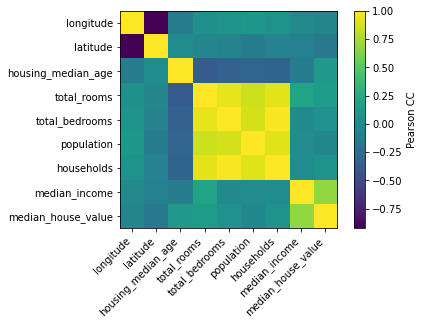

In [ ]:
plt.imshow(corr_matrix)

# Set ticks
xt = plt.xticks(range(9), housing.columns, ha='right', rotation=45)
yt = plt.yticks(range(9), housing.columns, ha='right', rotation=0)

# Set colorbar
plt.colorbar(label='Pearson CC')

Funciones interesantes de `matplotlib.pyplot`:

* plot()
* scatter()
* hist()
* bar()
* boxplot()
* violinplot()

Text(0, 0.5, 'Latitude')

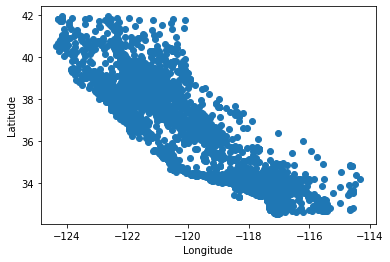

In [ ]:
plt.scatter(housing.longitude, housing.latitude)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

**Ejercicios**

1) Grafiquen al menos un histograma con la/s variable/s que consideren significativas.

2) Incluyan otras variables en el plot de `scatter()` usando los argumentos de `color` (o `c`) o `size` (or `s`). También pueden hacer que los gráficos se vean mejor usando puntos semi-transparentes con `alpha`

**Ejemplos**

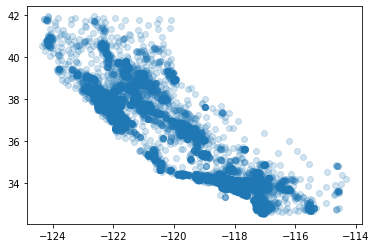

In [ ]:
plt.scatter(housing.longitude, housing.latitude, alpha=0.2)

Se puede ver como unas regiones están más densamente pobladas que otras.

**Conclusion**

Hemos partido con un archivos csv y llegado a algunas visualizaciones más o menos informativas.
Hemos explorado como las variables dependen unas de otras y algunas particularidades en algunas columnas (ej, valores faltantes)
Este tipo de análisis exploratorio de los datos es un primer paso requerido en todos los proyectos de Machine Learning y una herramienta poderosa para extraer información a los datos que tengamos.

---

# ¿Dónde conseguir data?

## Repositorios públicos

[UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)

[Kaggle datasets](https://www.kaggle.com/datasets)

[Amazon’s AWS datasets](https://registry.opendata.aws/)

## Meta portales
[Data Portals](http://dataportals.org/)

[OpenDataMonitor](https://opendatamonitor.eu/frontend/web/index.php?r=dashboard%2Findex)

[Quandl](https://www.quandl.com/)

## Reddit

[Datasets](https://www.reddit.com/r/datasets/)

# Apéndice: Pandas DataFrames

In [ ]:
bedrooms_and_rooms = housing[["total_bedrooms", "total_rooms"]]
print(bedrooms_and_rooms)
print(f"Type: {type(bedrooms_and_rooms)}")

       total_bedrooms  total_rooms
0               129.0        880.0
1              1106.0       7099.0
2               190.0       1467.0
3               235.0       1274.0
4               280.0       1627.0
...               ...          ...
20635           374.0       1665.0
20636           150.0        697.0
20637           485.0       2254.0
20638           409.0       1860.0
20639           616.0       2785.0

[20640 rows x 2 columns]
Type: <class 'pandas.core.frame.DataFrame'>
